Check Python version

In [1]:
!python --version

Python 3.9.12


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from darts import TimeSeries
from darts.datasets import WeatherDataset
from darts.utils.missing_values import missing_values_ratio, fill_missing_values

### **Extract Data**

In [4]:
# Local directory
#data_dir = '../datasets/climate'
#file_name = 'temp_anom_w_forcing'
#data_dir = '../datasets/finance'
#file_name = 'Returns_short_interest_data_train'
#file_path = f'{data_dir}/{file_name}.csv'

In [5]:
#dataset = pd.read_csv(file_path)

In [6]:
series = WeatherDataset().load()
series_filled = fill_missing_values(series)

In [7]:
dataset = series.pd_dataframe().reset_index()
dataset.index.name = None
print(dataset.index.name)

None


In [8]:
dataset['Date Time'] = pd.to_datetime(dataset['Date Time'])

In [9]:
dataset.shape

(52704, 22)

In [10]:
dataset.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],
      dtype='object', name='component')

In [11]:
dataset.head()

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [12]:
dataset.tail()

component,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
52699,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
52700,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
52701,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2
52702,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,433.9
52703,2021-01-01 00:00:00,978.24,2.01,276.89,-0.66,82.4,7.06,5.82,1.24,3.71,...,0.57,1.08,221.3,0.0,0.0,0.0,0.0,0.0,13.48,436.5


In [13]:
corr_matrix = dataset.corr()
corr_matrix['p (mbar)'].sort_values()

/tmp/ipykernel_4557/978569317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


component
max. wv (m/s)          -0.229758
Tpot (K)               -0.223450
Tdew (degC)            -0.207279
H2OC (mmol/mol)        -0.201173
sh (g/kg)              -0.200954
VPact (mbar)           -0.183764
raining (s)            -0.135032
wd (deg)               -0.129086
T (degC)               -0.127303
VPmax (mbar)           -0.098903
Tlog (degC)            -0.082450
rain (mm)              -0.071890
rh (%)                 -0.068391
wv (m/s)               -0.010172
CO2 (ppm)              -0.003537
VPdef (mbar)           -0.002802
max. PAR (µmol/m²/s)    0.048889
PAR (µmol/m²/s)         0.067916
SWDR (W/m²)             0.073812
rho (g/m**3)            0.437440
p (mbar)                1.000000
Name: p (mbar), dtype: float64

In [14]:
col_list = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)']

In [15]:
series_filled = TimeSeries.from_dataframe(dataset, 'Date Time', col_list)

In [16]:
rho_normalized = (series_filled['rho (g/m**3)'] - series_filled['rho (g/m**3)'].values().min())/(series_filled['rho (g/m**3)'].values().max() - series_filled['rho (g/m**3)'].values().min())

target_normalized = (series_filled['p (mbar)'] - series_filled['p (mbar)'].values().min())/(series_filled['p (mbar)'].values().max() - series_filled['p (mbar)'].values().min())

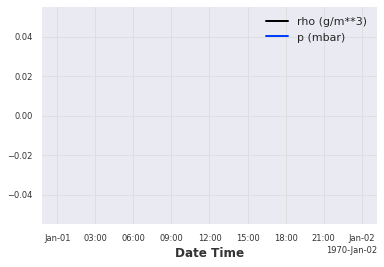

In [17]:
rho_normalized.plot() # MTR
target_normalized.plot();

Define the required time and target columns

In [18]:
time_col = dataset.columns[0]
target_col = dataset.columns[-1]
dataset[time_col] = dataset[time_col].astype(str)

In [19]:
# trim the anomaly part
dataset_partial = dataset[dataset['Date Time'] > '2020-12-15']  # Use this to trim!

In [20]:
dataset_partial.shape

(2449, 22)

Change target column to float

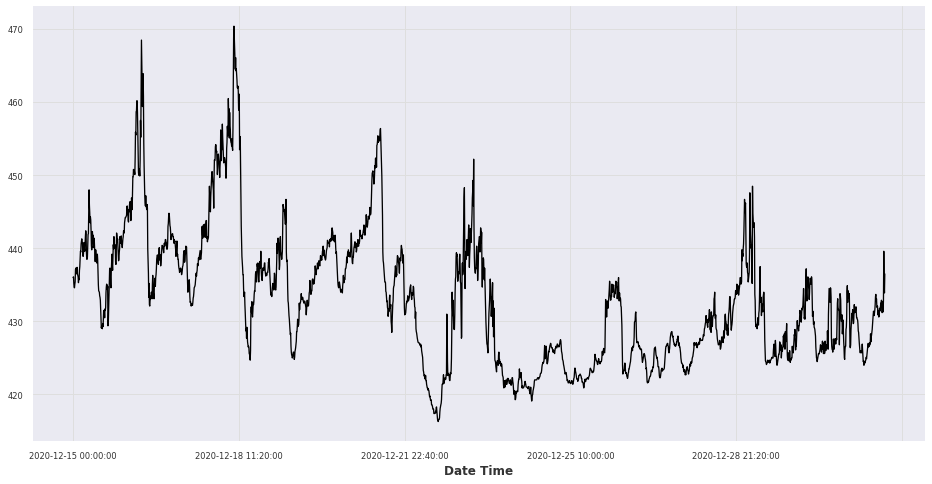

In [21]:
figsize = (16, 8)
dataset_partial.set_index(time_col)[target_col].plot(figsize=figsize);

In [22]:
# dataset[target_col] = dataset[target_col].astype(float)

In [23]:
# dataset.head()

Split dataset into train and test sets

In [24]:
train_size = 0.8
train_points = int(train_size*len(dataset_partial))
train_df = dataset_partial.iloc[:train_points]
test_df = dataset_partial.iloc[train_points:]

Plot graph

In [25]:
train_df['Date Time'] = train_df['Date Time'].astype('str')

/tmp/ipykernel_4557/3530557199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Date Time'] = train_df['Date Time'].astype('str')


In [26]:
train_df.shape

(1959, 22)

### **Train API**

Train data: convert df to list-of-list

In [27]:
train_data = []
for value in train_df.values:
    train_data.append(list(value))

In [28]:
train_data[:2]

[['2020-12-15 00:00:00',
  986.84,
  3.99,
  278.19,
  1.92,
  86.3,
  8.13,
  7.02,
  1.11,
  4.43,
  7.11,
  1237.11,
  3.02,
  4.47,
  170.3,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.45,
  436.0],
 ['2020-12-15 00:10:00',
  986.72,
  4.06,
  278.27,
  1.92,
  85.9,
  8.17,
  7.02,
  1.15,
  4.44,
  7.11,
  1236.63,
  2.58,
  3.82,
  172.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  13.43,
  436.1]]

Custom Model Request (optional)

In [29]:
# Default model request
model_request = {
    'type': 'meta_wa',  # 'meta_wa'
    'scorers': ['smape', 'mape'],
    'params': {
        'preprocessors': [
            {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            {'type': 'darts_autoets'},
            # {'type': 'darts_autoarima'},  # Auto-ARIMA does not work atm, do not uncomment!!
            {'type': 'darts_autotheta'},
            {'type': 'stats_autotheta'},
        ],
    },
}

# Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['smape', 'mape'],
#     'param': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }

Train API JSON Payload

In [30]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

In [31]:
api_json

{'data': [['2020-12-15 00:00:00',
   986.84,
   3.99,
   278.19,
   1.92,
   86.3,
   8.13,
   7.02,
   1.11,
   4.43,
   7.11,
   1237.11,
   3.02,
   4.47,
   170.3,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   13.45,
   436.0],
  ['2020-12-15 00:10:00',
   986.72,
   4.06,
   278.27,
   1.92,
   85.9,
   8.17,
   7.02,
   1.15,
   4.44,
   7.11,
   1236.63,
   2.58,
   3.82,
   172.1,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   13.43,
   436.1],
  ['2020-12-15 00:20:00',
   986.66,
   4.08,
   278.3,
   1.91,
   85.7,
   8.18,
   7.01,
   1.17,
   4.43,
   7.11,
   1236.48,
   2.64,
   4.05,
   170.5,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   13.42,
   435.2],
  ['2020-12-15 00:30:00',
   986.58,
   4.17,
   278.39,
   1.88,
   85.0,
   8.24,
   7.0,
   1.24,
   4.43,
   7.1,
   1235.98,
   3.19,
   4.89,
   168.5,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   13.42,
   434.7],
  ['2020-12-15 00:40:00',
   986.46,
   4.23,
   278.46,
   1.84,
   84.4,
   8.27,
   6.98,
   1.29,
   4.41,


Build URL

In [32]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [33]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [34]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [35]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: user 29.5 ms, sys: 188 µs, total: 29.7 ms
Wall time: 2min 38s


In [36]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCIZkBACAZAQAle8CABgAAACL7wIAZUsAAD+AAHNvZGV0QZRfXWFwlHJscy50YZRGQZOMbnNzcmlzlB9ldHhyLmFhlIxzFGNpSWkpBRh0ci5nYW5yfWFkLi5ldx9tk3RkKIwucl9wRGMcY2F0REFKUnlllEtO/0MBlHl1eQ5vlGSUlE0CUk7/KEt0ABbg/////////6QAHwVzbVJwYnNjlG+UlGh9YXJljG5wlGhoAQJSlP90MmFoH5RLCHVnjJRlaGFpjEkpBTFoDWhoAYk9Bs+ZYiz1v4hRHxvkrndBCtSdZjD5w4xWH+iye0UO2KFrNP3HkFoj7bZ/H0kS3KVvOALLlF4n8bqETRbgqXM8Bs+ZYiv1vohRG+StH3dACtOdZjD5woxVH+iye0QO16FqNP3HkFkj7LZ/SRLbH6VuOAHLlF4n8LqDTRbgqXI8Bc+YYiv1vodRGuStd0AJH9OcZi/5woxVHuixe0QO16BqM/3GkFkj7LV/SBLbpW43HwHKlF0n8LqDTBbfqXI8Bc6YYSv0vodRGuOtdkAJ05xlHy/4wotVHuixekQN16BqM/zGj1ki7LV/SBHbpG43AcqTH10m8LmDTBbfqHI7Bc6YYSr0vYdQGuOtdj8J0pxlL/jBH4tUHuexekQN1qBpM/zGj1gi67V+SBHbpG03AMqTXSbvH7mCTBXfqHI7BM6XYSr0vYZQGeOsdj8J0ptlLvjBi1QdH+ewekMN1qBpMvzFj1gi67R+RxHapG03AMmTXCbvuYJLHxXeqHE7BM6XYCrzvYZQGeKsdT8I0ptlLvfBilQd57B5H0MM1p9pMvzFjlgh67R+RxDao202AMmTXCXvuIJLFd6nH3E6BM2XYCrzvIZPGeKsdT4I0ZtkLvfBilMd5rB5QwzVH59oMvvFjlgh6rR9RxDao2w2/8mSXCXvuIFLFN6ncToDH82WYCnzvIZPGOKrdT4I0ZpkLffAilMd5q95Q

### **Forecast API**

Forecast Dates: predict the next 32 years of temperature anomaly data (1980-2012)

In [37]:
test_data = []
for value in test_df.drop(columns=target_col).values:
    test_data.append(list(value))

Model from Train API

In [38]:
model = train_json_out['model']

Forecast API JSON Payload

In [39]:
api_json = {
    'model': model,
    'data': test_data
}

In [40]:
api_json

{'model': 'AgEBCIZkBACAZAQAle8CABgAAACL7wIAZUsAAD+AAHNvZGV0QZRfXWFwlHJscy50YZRGQZOMbnNzcmlzlB9ldHhyLmFhlIxzFGNpSWkpBRh0ci5nYW5yfWFkLi5ldx9tk3RkKIwucl9wRGMcY2F0REFKUnlllEtO/0MBlHl1eQ5vlGSUlE0CUk7/KEt0ABbg/////////6QAHwVzbVJwYnNjlG+UlGh9YXJljG5wlGhoAQJSlP90MmFoH5RLCHVnjJRlaGFpjEkpBTFoDWhoAYk9Bs+ZYiz1v4hRHxvkrndBCtSdZjD5w4xWH+iye0UO2KFrNP3HkFoj7bZ/H0kS3KVvOALLlF4n8bqETRbgqXM8Bs+ZYiv1vohRG+StH3dACtOdZjD5woxVH+iye0QO16FqNP3HkFkj7LZ/SRLbH6VuOAHLlF4n8LqDTRbgqXI8Bc+YYiv1vodRGuStd0AJH9OcZi/5woxVHuixe0QO16BqM/3GkFkj7LV/SBLbpW43HwHKlF0n8LqDTBbfqXI8Bc6YYSv0vodRGuOtdkAJ05xlHy/4wotVHuixekQN16BqM/zGj1ki7LV/SBHbpG43AcqTH10m8LmDTBbfqHI7Bc6YYSr0vYdQGuOtdj8J0pxlL/jBH4tUHuexekQN1qBpM/zGj1gi67V+SBHbpG03AMqTXSbvH7mCTBXfqHI7BM6XYSr0vYZQGeOsdj8J0ptlLvjBi1QdH+ewekMN1qBpMvzFj1gi67R+RxHapG03AMmTXCbvuYJLHxXeqHE7BM6XYCrzvYZQGeKsdT8I0ptlLvfBilQd57B5H0MM1p9pMvzFjlgh67R+RxDao202AMmTXCXvuIJLFd6nH3E6BM2XYCrzvIZPGeKsdT4I0ZtkLvfBilMd5rB5QwzVH59oMvvFjlgh6rR9RxDao2w2/8mSXCXvuIFLFN6ncToDH82WYCnzvIZPGOKrdT4I0ZpkLffAilMd5q95Q

Build URL (same as train except for the endpoint)

In [41]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [42]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: user 14.3 ms, sys: 3.08 ms, total: 17.4 ms
Wall time: 253 ms


In [43]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['2020-12-28T14:30:00', 427.6974040531153],
  ['2020-12-28T14:40:00', 427.69340012182374],
  ['2020-12-28T14:50:00', 427.6893961905322],
  ['2020-12-28T15:00:00', 427.68539225924064],
  ['2020-12-28T15:10:00', 427.68138832794915],
  ['2020-12-28T15:20:00', 427.67738439665766],
  ['2020-12-28T15:30:00', 427.67338046536605],
  ['2020-12-28T15:40:00', 427.66937653407456],
  ['2020-12-28T15:50:00', 427.665372602783],
  ['2020-12-28T16:00:00', 427.66136867149146],
  ['2020-12-28T16:10:00', 427.6573647401999],
  ['2020-12-28T16:20:00', 427.65336080890836],
  ['2020-12-28T16:30:00', 427.6493568776168],
  ['2020-12-28T16:40:00', 427.6453529463253],
  ['2020-12-28T16:50:00', 427.6413490150338],
  ['2020-12-28T17:00:00', 427.6373450837422],
  ['2020-12-28T17:10:00', 427.6333411524507],
  ['2020-12-28T17:20:00', 427.6293372211592],
  ['2020-12-28T17:30:00', 427.6253332898676],
  ['2020-12-28T17:40:00', 427.6213293585761],
  ['2020-12-28T17:50:00', 427.6173254272845],
  ['2020-12-28T18:0

Combine forecast dates and output

In [44]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [45]:
forecast_df.shape

(490, 2)

In [46]:
forecast_df.columns

Index(['Date Time', 'CO2 (ppm)'], dtype='object')

In [47]:
forecast_df.head()

,Date Time,CO2 (ppm)
0,2020-12-28T14:30:00,427.697404
1,2020-12-28T14:40:00,427.693400
2,2020-12-28T14:50:00,427.689396
3,2020-12-28T15:00:00,427.685392
4,2020-12-28T15:10:00,427.681388


In [48]:
forecast_df.tail()

,Date Time,CO2 (ppm)
485,2020-12-31T23:20:00,425.755497
486,2020-12-31T23:30:00,425.751493
487,2020-12-31T23:40:00,425.747490
488,2020-12-31T23:50:00,425.743486
489,2021-01-01T00:00:00,425.739482


Plot train and forecast side-by-side

/tmp/ipykernel_4557/2998340865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['color'] = 'b'


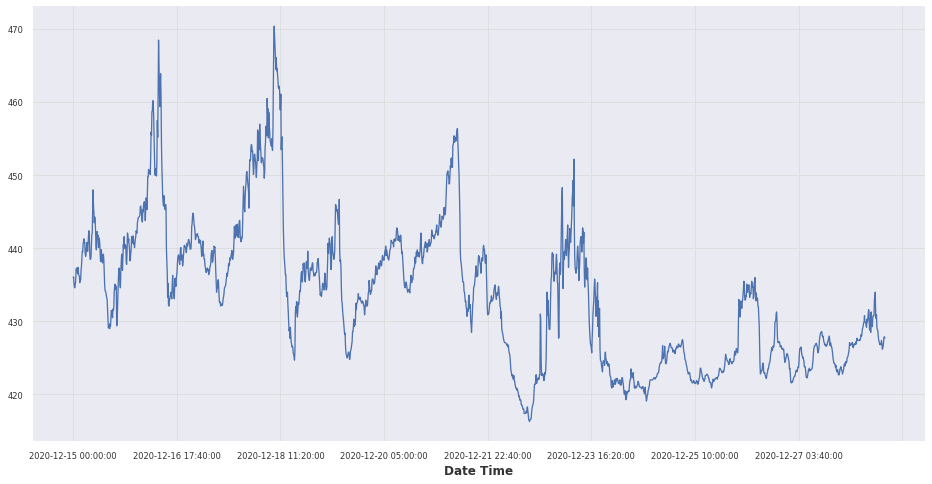

In [49]:
train_df['color'] = 'b'
train_df.set_index(time_col)[target_col].plot(figsize=figsize, color=train_df['color']);

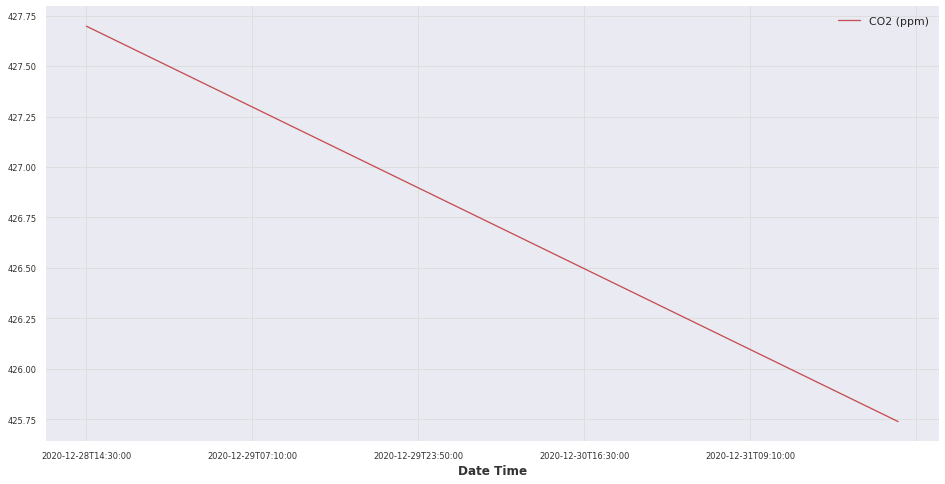

In [50]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and test sets

In [51]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [52]:
df.shape

(2449, 23)

In [53]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm),color
0,2020-12-15 00:00:00,986.84,3.99,278.19,1.92,86.3,8.13,7.02,1.11,4.43,...,4.47,170.3,0.0,0.0,0.0,0.0,0.0,13.45,436.0,b
1,2020-12-15 00:10:00,986.72,4.06,278.27,1.92,85.9,8.17,7.02,1.15,4.44,...,3.82,172.1,0.0,0.0,0.0,0.0,0.0,13.43,436.1,b
2,2020-12-15 00:20:00,986.66,4.08,278.30,1.91,85.7,8.18,7.01,1.17,4.43,...,4.05,170.5,0.0,0.0,0.0,0.0,0.0,13.42,435.2,b
3,2020-12-15 00:30:00,986.58,4.17,278.39,1.88,85.0,8.24,7.00,1.24,4.43,...,4.89,168.5,0.0,0.0,0.0,0.0,0.0,13.42,434.7,b
4,2020-12-15 00:40:00,986.46,4.23,278.46,1.84,84.4,8.27,6.98,1.29,4.41,...,4.09,153.9,0.0,0.0,0.0,0.0,0.0,13.42,434.6,b


In [54]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm),color
2444,2020-12-31T23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.755497,r
2445,2020-12-31T23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.751493,r
2446,2020-12-31T23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.747490,r
2447,2020-12-31T23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.743486,r
2448,2021-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.739482,r


Plot combined train and test sets with the vertical black line as the cut-off

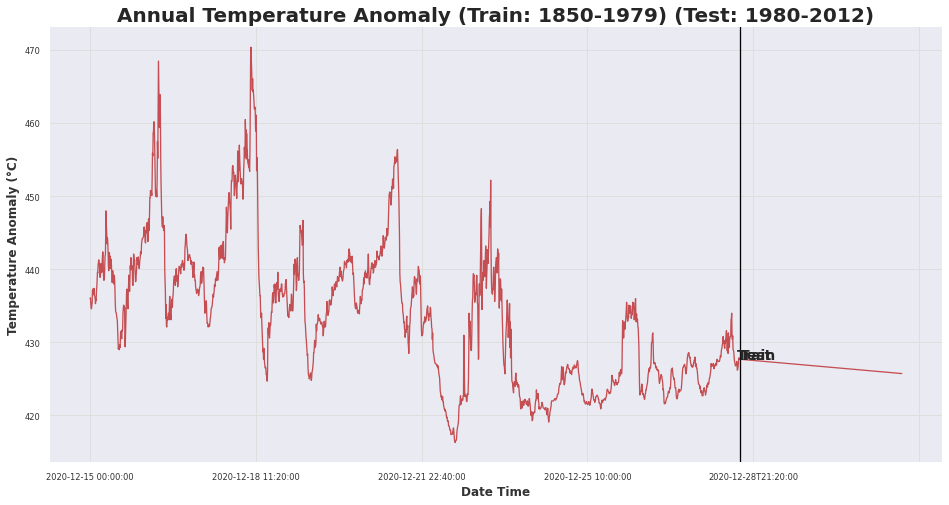

In [55]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
plt.axvline(x=len(train_df), color='black', label='Train/Test set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Test', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='Temperature Anomaly (' + u'\N{DEGREE SIGN}' + 'C)')
plt.title(label='Annual Temperature Anomaly (Train: 1850-1979) (Test: 1980-2012)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset to compare

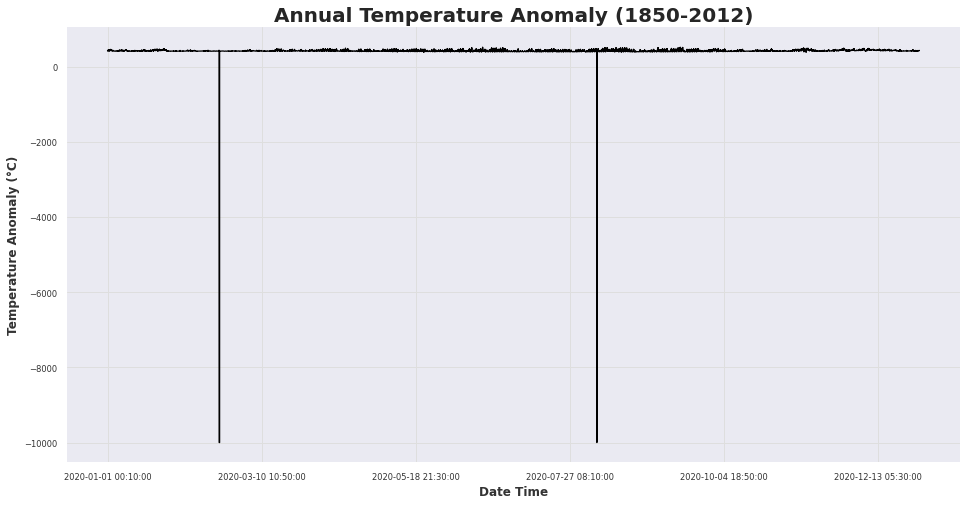

In [56]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.ylabel(ylabel='Temperature Anomaly (' + u'\N{DEGREE SIGN}' + 'C)')
plt.title(label='Annual Temperature Anomaly (1850-2012)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset (blue) with SYBIL forecasted values (red)

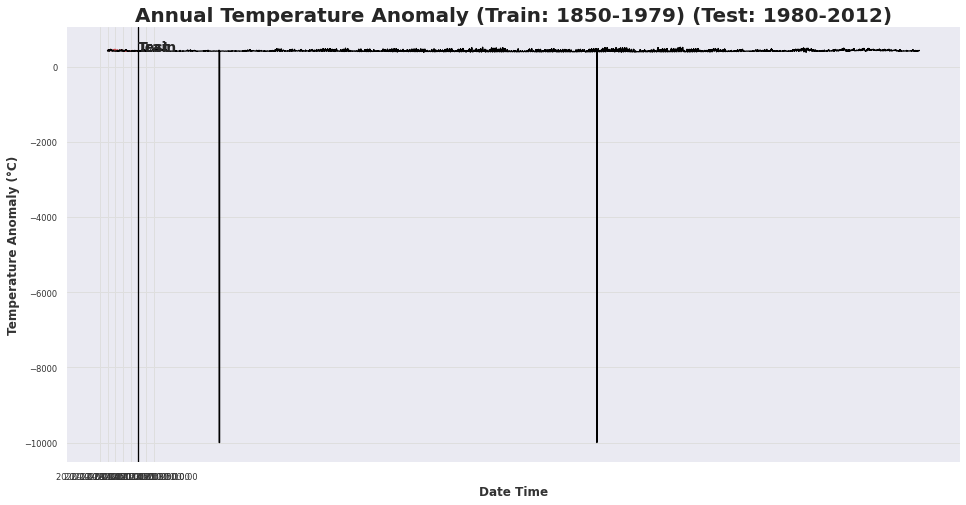

In [57]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.axvline(x=len(train_df), color='black', label='Train/Test set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Test', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='Temperature Anomaly (' + u'\N{DEGREE SIGN}' + 'C)')
plt.title(label='Annual Temperature Anomaly (Train: 1850-1979) (Test: 1980-2012)', fontweight='bold', fontsize=20)
plt.show();